In [16]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet


import warnings
warnings.filterwarnings('ignore')
# import seaborn as sns

In [2]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [3]:
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(4727777, 8)

In [5]:
df.isna().sum() / df.shape[0] * 100

Timestamp             0.00000
Open                 26.30141
High                 26.30141
Low                  26.30141
Close                26.30141
Volume_(BTC)         26.30141
Volume_(Currency)    26.30141
Weighted_Price       26.30141
dtype: float64

In [7]:
print(f'Old size: {df.shape}')
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]
df = df.set_index('Timestamp')
df = df.resample("24H").mean()
print(f'New size: {df.shape}')
df.head()

Old size: (4727777, 8)
New size: (3289, 7)


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.4650,4.482500,4.4650,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.7100,4.710000,4.7100,4.710000,5.751000,27.639580,4.710000
2012-01-02,5.0000,5.000000,5.0000,5.000000,14.574000,72.870000,5.000000
2012-01-03,5.2525,5.252500,5.2525,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.2000,5.223333,5.2000,5.223333,11.914807,63.119577,5.208159


In [8]:
df.isna().sum() / df.shape[0] * 100

Open                 0.091213
High                 0.091213
Low                  0.091213
Close                0.091213
Volume_(BTC)         0.091213
Volume_(Currency)    0.091213
Weighted_Price       0.091213
dtype: float64

In [9]:
df.fillna(method='ffill', inplace=True)
df.isna().sum() / df.shape[0] * 100

Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Volume_(BTC)         0.0
Volume_(Currency)    0.0
Weighted_Price       0.0
dtype: float64

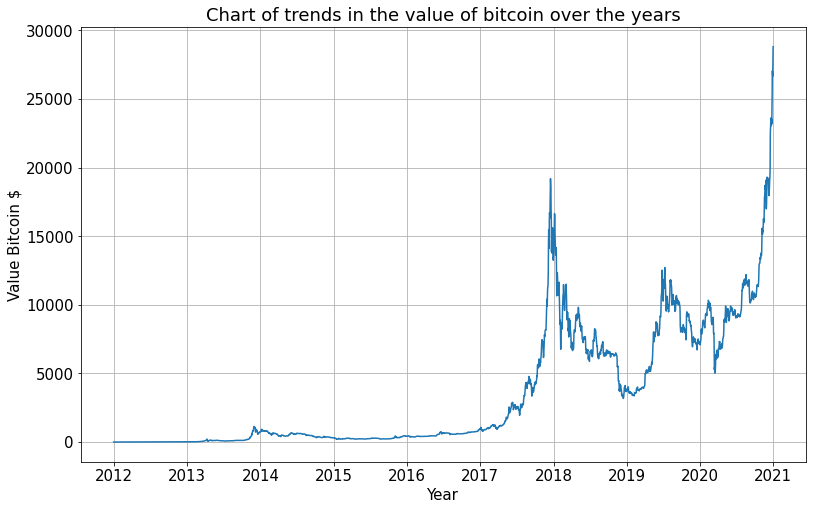

In [11]:
plt.figure(figsize=(13,8))
plt.rcParams.update({'font.size': 15})
plt.plot(df['Weighted_Price']);
plt.xlabel('Year')
plt.ylabel('Value Bitcoin $')
plt.title('Chart of trends in the value of bitcoin over the years')
plt.grid()
plt.show()

In [22]:
df.reset_index(inplace=True)
prophet_df = df[['Timestamp', 'Weighted_Price']]
prophet_df.rename(columns={'Timestamp':'ds', 'Weighted_Price': 'y'}, inplace=True)

In [23]:
prophet_df.head()

,ds,y
0,2011-12-31,4.471603
1,2012-01-01,4.710000
2,2012-01-02,5.000000
3,2012-01-03,5.252500
4,2012-01-04,5.208159


In [30]:
proph = Prophet(daily_seasonality=True)

In [31]:
%%time
proph.fit(prophet_df[['ds', 'y']])

Wall time: 24.2 s


In [32]:
future = proph.make_future_dataframe(periods=365)
future.tail()

,ds
3649,2021-12-27
3650,2021-12-28
3651,2021-12-29
3652,2021-12-30
3653,2021-12-31


In [33]:
pred = proph.predict(future)

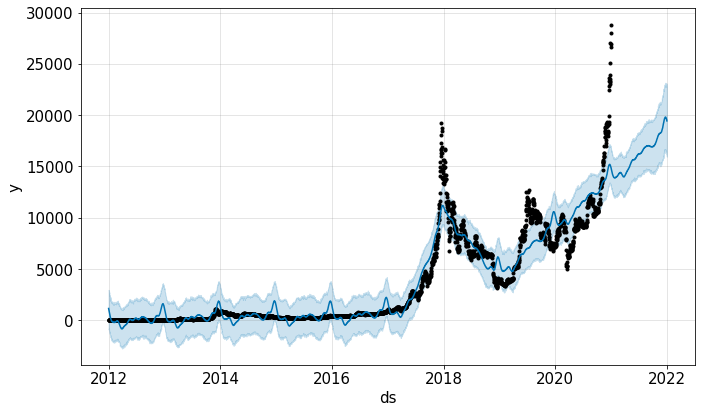

In [34]:
fig1 = proph.plot(pred)

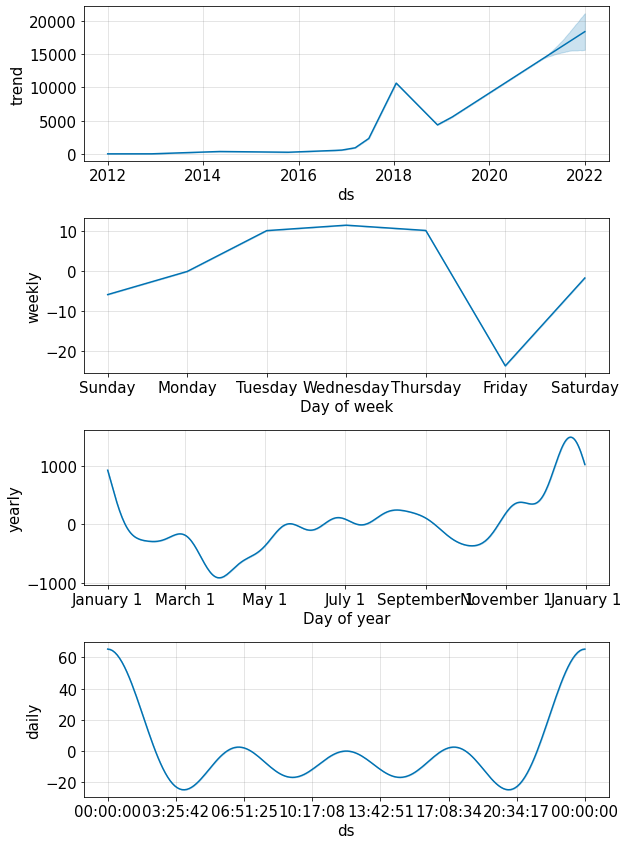

In [38]:
fig2 = proph.plot_components(pred);